## Brewmatica 2019 Jupyter Notebook

#### Required Tasks:
1. Benchmark the plants and establish relationship between variables to increase efficiency.
2. Suggest any process change/alternative and its impact on the overall process. 
3. Identify new advancements in the malting process and its benefits. Also assess the capex investment required to implement them with the break-even period.

In [1]:
%matplotlib inline 
import matplotlib as mpl
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import math
!pip install xlrd
!pip install seaborn
import seaborn as sns

     |████████████████████████████████| 112kB 19.3MB/s eta 0:00:01


In [2]:
filename='/resources/Brewmatica 2019/Data Set.csv'
df = pd.read_csv(filename)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df

,Malting Plant,Malt Line,Number of Steep Lines,MA-K2301-Minimum Steeping Cycle Time,Duration of Steep (hours),Steep Cycle Time (Hours),Barley Batch Size (MT),Number of immersions (#),Number of aerations (#),Water Attemporation (Y/N),Air Attemporation S (Y/N),End of Steep Moisture (%),Type of Steep Tanks (Choose),Steep Transfer-In (Choose),Steep Transfer-Out (Choose),Minimum Germination Time MA-K2301,Duration of Germ (hours),Steep to Germ transfer time (Hours),Germ to Kiln transfer time (Hours),Water Attemporation G(Y/N),Air Attemporation G(Y/N),Green Malt Moisture at end Germination (%),Vessel Cleaning Time (Hours),Start of Germ Temp ('C),Max of Germ Temp ('C),End of Germ Temp ('C),Minimum Kilning time MA-K2301,Duration of Kiln (hours),"Kiln-Single, Double or triple deck (Choose)",Kiln Heat Equipment Type\nDirect or Indirect Fired (Choose),"Heating Source for Kiln\nAir to Air, Hot water Boiler, Steam Boiler, other (Choose)",Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours),Moisture (%),Gross Malt Produced,Dirty Barley to Clean Malt Yield (#),Clean Barley to Clean Malt Yield (#),Total Barley to Malt Loss,Total Technical Productivity (MT per man hr),Total Plant Productivity (MT per man hour),Total Energy Ratio (MJ/Metric Tonne),Electrical Usage ratio (KWh/MT of cleaned malt),Heat Usage Ratio (MJ/MT of cleaned malt),Water Usage Ratio (m3/MT of cleaned malt),Electrical Usage ratio (KWh/MT of cleaned malt).1,Heat Usage Ratio (MJ/MT of cleaned malt).1,Water Usage Ratio (m3/MT of cleaned malt).1,Consumption,Total Barley to Malt Loss.1,Total Technical Productivity (MT per man hr).1
0,PLANT1,5,7,NaN,12.0,24.0,50.00,1.0,1,N,Y,38.00,Conical,pump,mechanical,NaN,76.80,1.50,3.0,N,Y,43.0,1.5,18.0,22.0,15.0,NaN,19.60,Single-Kiln,Direct,Hot Water Boiler,1,4.5,85005,1.130537,1.177772,0.177772,0.946304,0.380534,4706.265800,135.10200,4219.898600,2.8989,0.354022,0.463725,0.019456,0.837203,0.115196,0.107361
1,PLANT2,1,1,42.0,42.0,42.0,125.00,2.0,2,Y,Y,45.00,Cylindro Conical steep tanks,wet,Dry transfer,110.0,110.00,3.00,3.0,Y,Y,43.0,2,18.0,22.0,22.0,NaN,34.00,Single-Kiln,Indirect Fired,Steam Boiler,1.5,4.8,9724,1.299270,1.200915,0.299270,0.209705,0.072189,5165.047800,216.59550,4385.304000,3.7500,0.567568,0.481902,0.025168,1.074637,0.025528,0.020367
2,PLANT3,1,2,35.0,28.0,37.0,360.00,2.0,5min on 15min off during wet stand,NaN,N,46.00,Cylindro Conical steep tanks,wet,Dry transfer,138.0,117.00,3.50,4.5,N,N,44.0,4,14.0,19.0,14.0,NaN,28.00,Single-Kiln,Indirect Fired,Steam Boiler,N,4.6,93584,1.328635,1.122158,0.328635,1.940973,0.955555,3327.504000,146.92000,2798.592000,4.4300,0.384990,0.307538,0.029732,0.722259,0.236279,0.269594
3,PLANT4,1,6,32.0,32.0,36.0,12.50,3.0,2,Y,N,43.25,Conical,dry,wet,95.0,100.00,0.50,0.7,N,Y,43.5,manual,17.0,15.5,15.5,24.0,24.00,Single-Kiln,Indirect Fired,Steam Boiler,0,4.5,27226,1.193624,0.138847,0.193624,0.451288,0.169894,3896.938800,179.38350,3251.158200,5.2157,0.470057,0.357270,0.035005,0.862332,0.054936,0.047933
4,PLANT5,1,4,28.0,28.0,36.0,174.00,2.0,2,Y,Y,42.50,Conical,Conveyors,Conveyors + Green Malt Leg,NaN,63.00,2.00,2.5,Y,Y,46.0,2,18.8,28.8,26.6,NaN,27.00,Double deck,Indirect Fired,Steam Boiler,0.25,5.0,131600,1.236279,1.208664,0.236279,2.270022,1.560295,3593.026760,149.86460,3053.514200,6.3524,0.392706,0.335551,0.042634,0.770890,0.276336,0.440211
5,PLANT6,1,2,28.0,40.0,48.0,350.00,3.0,3,Y,Y,45.00,FBST,wet,Dry transfer,74.5,83.50,2.50,2.5,Y,Y,45.0,4,15.5,14.5,12.0,20.5,24.75,Single-Kiln,Indirect Fired,Gas Burner,1,4.5,81854,1.187440,1.185655,0.187440,2.386695,1.117554,3026.674520,129.65370,2559.921200,6.0782,0.339745,0.281310,0.040793,0.661848,0.290538,0.315299
6,PLANT7,3,3,34.0,30.0,34.0,330.00,1.0,1,Y,N,36.00,Conical,Pump,Gravity,80.0,72.00,2.00,5.0,N,N,43.0,5,17.0,21.0,21.0,38.0,34.00,Single-Kiln,Indirect Fired,Hot Water Boiler,1,5.0,187245,0.000000,1.261522,0.261522,0.857527,0.857527,4107.897417,130.52706,3638.000000,3.7900,0.342034,0.399780,0.025436,0.767250,0.104389,0.241937
7,PLA

## Identifying and Handling Missing Values:

In [3]:
# Replacing NaN values with the means of their respective columns
df["MA-K2301-Minimum Steeping Cycle Time"].replace(0,np.nan,inplace=True)
min_steeping_cycle = df["MA-K2301-Minimum Steeping Cycle Time"].astype("float").mean(axis=0)
df["MA-K2301-Minimum Steeping Cycle Time"].replace(np.nan, math.ceil(min_steeping_cycle), inplace=True)
barley_batch_size = df["Barley Batch Size (MT)"].astype("float").mean(axis=0)
df["Barley Batch Size (MT)"].replace(np.nan, math.ceil(barley_batch_size), inplace=True)
immersions = df["Number of immersions (#)"].astype("float").mean(axis=0)
df["Number of immersions (#)"].replace(np.nan, math.ceil(immersions), inplace=True)
df["Number of aerations (#)"].replace('5min on 15min off during wet stand',np.nan,inplace=True)
aerations = df["Number of aerations (#)"].astype("float").mean(axis=0)
df["Number of aerations (#)"].replace(np.nan, math.ceil(aerations), inplace=True)
df["Water Attemporation (Y/N)"].replace(np.nan,'Y',inplace=True)
df["Water Attemporation (Y/N)"].replace('n','N',inplace=True)
df["Air Attemporation S (Y/N)"].replace(np.nan,'Y',inplace=True)
df["Air Attemporation S (Y/N)"].replace('n','N',inplace=True)
end_moisture = df["End of Steep Moisture (%)"].astype("float").mean(axis=0)
df["End of Steep Moisture (%)"].replace(np.nan, math.ceil(end_moisture), inplace=True)
df["End of Steep Moisture (%)"].replace(0.41,41,inplace=True)
df["Type of Steep Tanks (Choose)"].replace(np.nan,'Conical',inplace=True)
df["Steep Transfer-In (Choose)"].replace('0','Wet',inplace=True)
df["Steep Transfer-In (Choose)"].replace(np.nan,'Wet',inplace=True)
df["Steep Transfer-Out (Choose)"].replace('0','Dry transfer',inplace=True)
df["Steep Transfer-Out (Choose)"].replace(np.nan,'Dry transfer',inplace=True)
min_germination = df["Minimum Germination Time MA-K2301"].astype("float").mean(axis=0)
df["Minimum Germination Time MA-K2301"].replace(np.nan, math.ceil(min_germination), inplace=True)
steep_to_germ_transfer = df["Steep to Germ transfer time (Hours)"].astype("float").mean(axis=0)
df["Steep to Germ transfer time (Hours)"].replace(np.nan, math.ceil(steep_to_germ_transfer), inplace=True)
germ_to_kiln_transfer = df["Germ to Kiln transfer time (Hours)"].astype("float").mean(axis=0)
df["Germ to Kiln transfer time (Hours)"].replace(np.nan, math.ceil(germ_to_kiln_transfer), inplace=True)
df["Water Attemporation G(Y/N)"].replace(np.nan,'N',inplace=True)
df["Water Attemporation G(Y/N)"].replace('0','N',inplace=True)
df["Air Attemporation G(Y/N)"].replace(np.nan,'Y',inplace=True)
df["Air Attemporation G(Y/N)"].replace('0','Y',inplace=True)
df["Green Malt Moisture at end Germination (%)"].replace(0, np.nan, inplace=True)
green_malt_moisture = df["Green Malt Moisture at end Germination (%)"].astype("float").mean(axis=0)
df["Green Malt Moisture at end Germination (%)"].replace(np.nan, math.ceil(green_malt_moisture), inplace=True)
df["Vessel Cleaning Time (Hours)"].replace('manual', np.nan, inplace=True)
df["Vessel Cleaning Time (Hours)"].replace('0', np.nan, inplace=True)
cleaning_time = df["Vessel Cleaning Time (Hours)"].astype("float").mean(axis=0)
df["Vessel Cleaning Time (Hours)"].replace(np.nan, math.ceil(cleaning_time), inplace=True)
df["Start of Germ Temp ('C)"].replace(0, np.nan, inplace=True)
start_germ_temp = df["Start of Germ Temp ('C)"].astype("float").mean(axis=0)
df["Start of Germ Temp ('C)"].replace(np.nan, math.ceil(start_germ_temp), inplace=True)
df["Max of Germ Temp ('C)"].replace(0, np.nan, inplace=True)
max_germ_temp = df["Max of Germ Temp ('C)"].astype("float").mean(axis=0)
df["Max of Germ Temp ('C)"].replace(np.nan, math.ceil(max_germ_temp), inplace=True)
df["End of Germ Temp ('C)"].replace(0, np.nan, inplace=True)
end_germ_temp = df["End of Germ Temp ('C)"].astype("float").mean(axis=0)
df["End of Germ Temp ('C)"].replace(np.nan, math.ceil(end_germ_temp), inplace=True)
min_kilning_time = df["Minimum Kilning time MA-K2301"].astype("float").mean(axis=0)
df["Minimum Kilning time MA-K2301"].replace(np.nan, math.ceil(min_kilning_time), inplace=True)
kiln_duration = df["Duration of Kiln (hours)"].astype("float").mean(axis=0)
df["Duration of Kiln (hours)"].replace(np.nan, math.ceil(kiln_duration), inplace=True)
df["Kiln-Single, Double or triple deck (Choose)"].replace(np.nan,'Single-Kiln',inplace=True)
df["Kiln-Single, Double or triple deck (Choose)"].replace('Y','Single-Kiln',inplace=True)
df["Kiln-Single, Double or triple deck (Choose)"].replace('upstream','Single-Kiln',inplace=True)
df["Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours)"].replace('0',np.nan,inplace=True)
df["Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours)"].replace('N',np.nan,inplace=True)
cool_down_time = df["Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours)"].astype("float").mean(axis=0)
df["Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours)"].replace(np.nan, cool_down_time, inplace=True)
moisture_percentage = df["Moisture (%)"].astype("float").mean(axis=0)
df["Moisture (%)"].replace(np.nan, moisture_percentage, inplace=True)
df["Dirty Barley to Clean Malt Yield (#)"].replace(0, np.nan, inplace=True)
dirty_to_clean_yield = df["Dirty Barley to Clean Malt Yield (#)"].astype("float").mean(axis=0)
df["Dirty Barley to Clean Malt Yield (#)"].replace(np.nan, dirty_to_clean_yield, inplace=True)
df

,Malting Plant,Malt Line,Number of Steep Lines,MA-K2301-Minimum Steeping Cycle Time,Duration of Steep (hours),Steep Cycle Time (Hours),Barley Batch Size (MT),Number of immersions (#),Number of aerations (#),Water Attemporation (Y/N),Air Attemporation S (Y/N),End of Steep Moisture (%),Type of Steep Tanks (Choose),Steep Transfer-In (Choose),Steep Transfer-Out (Choose),Minimum Germination Time MA-K2301,Duration of Germ (hours),Steep to Germ transfer time (Hours),Germ to Kiln transfer time (Hours),Water Attemporation G(Y/N),Air Attemporation G(Y/N),Green Malt Moisture at end Germination (%),Vessel Cleaning Time (Hours),Start of Germ Temp ('C),Max of Germ Temp ('C),End of Germ Temp ('C),Minimum Kilning time MA-K2301,Duration of Kiln (hours),"Kiln-Single, Double or triple deck (Choose)",Kiln Heat Equipment Type\nDirect or Indirect Fired (Choose),"Heating Source for Kiln\nAir to Air, Hot water Boiler, Steam Boiler, other (Choose)",Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours),Moisture (%),Gross Malt Produced,Dirty Barley to Clean Malt Yield (#),Clean Barley to Clean Malt Yield (#),Total Barley to Malt Loss,Total Technical Productivity (MT per man hr),Total Plant Productivity (MT per man hour),Total Energy Ratio (MJ/Metric Tonne),Electrical Usage ratio (KWh/MT of cleaned malt),Heat Usage Ratio (MJ/MT of cleaned malt),Water Usage Ratio (m3/MT of cleaned malt),Electrical Usage ratio (KWh/MT of cleaned malt).1,Heat Usage Ratio (MJ/MT of cleaned malt).1,Water Usage Ratio (m3/MT of cleaned malt).1,Consumption,Total Barley to Malt Loss.1,Total Technical Productivity (MT per man hr).1
0,PLANT1,5,7,33.0,12.0,24.0,50.00,1.0,1,N,Y,38.00,Conical,pump,mechanical,94.0,76.80,1.50,3.0,N,Y,43.0,1.5,18.0,22.0,15.0,28.0,19.60,Single-Kiln,Direct,Hot Water Boiler,1,4.500000,85005,1.130537,1.177772,0.177772,0.946304,0.380534,4706.265800,135.10200,4219.898600,2.8989,0.354022,0.463725,0.019456,0.837203,0.115196,0.107361
1,PLANT2,1,1,42.0,42.0,42.0,125.00,2.0,2,Y,Y,45.00,Cylindro Conical steep tanks,wet,Dry transfer,110.0,110.00,3.00,3.0,Y,Y,43.0,2,18.0,22.0,22.0,28.0,34.00,Single-Kiln,Indirect Fired,Steam Boiler,1.5,4.800000,9724,1.299270,1.200915,0.299270,0.209705,0.072189,5165.047800,216.59550,4385.304000,3.7500,0.567568,0.481902,0.025168,1.074637,0.025528,0.020367
2,PLANT3,1,2,35.0,28.0,37.0,360.00,2.0,2,Y,N,46.00,Cylindro Conical steep tanks,wet,Dry transfer,138.0,117.00,3.50,4.5,N,N,44.0,4,14.0,19.0,14.0,28.0,28.00,Single-Kiln,Indirect Fired,Steam Boiler,0.760889,4.600000,93584,1.328635,1.122158,0.328635,1.940973,0.955555,3327.504000,146.92000,2798.592000,4.4300,0.384990,0.307538,0.029732,0.722259,0.236279,0.269594
3,PLANT4,1,6,32.0,32.0,36.0,12.50,3.0,2,Y,N,43.25,Conical,dry,wet,95.0,100.00,0.50,0.7,N,Y,43.5,4,17.0,15.5,15.5,24.0,24.00,Single-Kiln,Indirect Fired,Steam Boiler,0.760889,4.500000,27226,1.193624,0.138847,0.193624,0.451288,0.169894,3896.938800,179.38350,3251.158200,5.2157,0.470057,0.357270,0.035005,0.862332,0.054936,0.047933
4,PLANT5,1,4,28.0,28.0,36.0,174.00,2.0,2,Y,Y,42.50,Conical,Conveyors,Conveyors + Green Malt Leg,94.0,63.00,2.00,2.5,Y,Y,46.0,2,18.8,28.8,26.6,28.0,27.00,Double deck,Indirect Fired,Steam Boiler,0.25,5.000000,131600,1.236279,1.208664,0.236279,2.270022,1.560295,3593.026760,149.86460,3053.514200,6.3524,0.392706,0.335551,0.042634,0.770890,0.276336,0.440211
5,PLANT6,1,2,28.0,40.0,48.0,350.00,3.0,3,Y,Y,45.00,FBST,wet,Dry transfer,74.5,83.50,2.50,2.5,Y,Y,45.0,4,15.5,14.5,12.0,20.5,24.75,Single-Kiln,Indirect Fired,Gas Burner,1,4.500000,81854,1.187440,1.185655,0.187440,2.386695,1.117554,3026.674520,129.65370,2559.921200,6.0782,0.339745,0.281310,0.040793,0.661848,0.290538,0.315299
6,PLANT7,3,3,34.0,30.0,34.0,330.00,1.0,1,Y,N,36.00,Conical,Pump,Gravity,80.0,72.00,2.00,5.0,N,N,43.0,5,17.0,21.0,21.0,38.0,34.00,Single-Kiln,Indirect Fired,Hot Water Boiler,1,5.000000,187245,1.195231,1.261522,0.261522,0.857527,0.857527,4107.897417,130.52706,3638.000000,3.7900,0.342034,0.399780,0.025436,0.767250,0.10438

## Ensuring Correct Data Format:

In [4]:
df[["Number of aerations (#)"]] = df["Number of aerations (#)"].astype("int")
df["Vessel Cleaning Time (Hours)"] = df["Vessel Cleaning Time (Hours)"].astype("float")
df["Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours)"] = df["Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours)"].astype("float")
df["Gross Malt Produced"] = df["Gross Malt Produced"].astype("int")
df.dtypes

Malting Plant                                                                           object
Malt Line                                                                                int64
Number of Steep Lines                                                                    int64
MA-K2301-Minimum Steeping Cycle Time                                                   float64
Duration of Steep (hours)                                                              float64
Steep Cycle Time (Hours)                                                               float64
Barley Batch Size (MT)                                                                 float64
Number of immersions (#)                                                               float64
Number of aerations (#)                                                                  int64
Water Attemporation (Y/N)                                                               object
Air Attemporation S (Y/N)                         

In [5]:
# Printing the Name of Columns
headings = df.columns.values
print(headings)

['Malting Plant' 'Malt Line' 'Number of Steep Lines'
 'MA-K2301-Minimum Steeping Cycle Time' 'Duration of Steep (hours)'
 'Steep Cycle Time (Hours)' 'Barley Batch Size (MT)'
 'Number of immersions (#)' 'Number of aerations (#)'
 'Water Attemporation (Y/N)' 'Air Attemporation S (Y/N)'
 'End of Steep Moisture (%)' 'Type of Steep Tanks (Choose)'
 'Steep Transfer-In (Choose)' 'Steep Transfer-Out (Choose)'
 'Minimum Germination Time MA-K2301' 'Duration of Germ (hours)'
 'Steep to Germ transfer time (Hours)'
 'Germ to Kiln transfer time (Hours)' 'Water Attemporation G(Y/N)'
 'Air Attemporation G(Y/N)' 'Green Malt Moisture at end Germination (%)'
 'Vessel Cleaning Time (Hours)' "Start of Germ Temp ('C)"
 "Max of Germ Temp ('C)" "End of Germ Temp ('C)"
 'Minimum Kilning time MA-K2301' 'Duration of Kiln (hours)'
 'Kiln-Single, Double or triple deck (Choose)'
 'Kiln Heat Equipment Type\nDirect or Indirect Fired (Choose)'
 'Heating Source for Kiln\nAir to Air, Hot water Boiler, Steam Boiler, othe

In [6]:
df.describe()

,Malt Line,Number of Steep Lines,MA-K2301-Minimum Steeping Cycle Time,Duration of Steep (hours),Steep Cycle Time (Hours),Barley Batch Size (MT),Number of immersions (#),Number of aerations (#),End of Steep Moisture (%),Minimum Germination Time MA-K2301,Duration of Germ (hours),Steep to Germ transfer time (Hours),Germ to Kiln transfer time (Hours),Green Malt Moisture at end Germination (%),Vessel Cleaning Time (Hours),Start of Germ Temp ('C),Max of Germ Temp ('C),End of Germ Temp ('C),Minimum Kilning time MA-K2301,Duration of Kiln (hours),Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours),Moisture (%),Gross Malt Produced,Dirty Barley to Clean Malt Yield (#),Clean Barley to Clean Malt Yield (#),Total Barley to Malt Loss,Total Technical Productivity (MT per man hr),Total Plant Productivity (MT per man hour),Total Energy Ratio (MJ/Metric Tonne),Electrical Usage ratio (KWh/MT of cleaned malt),Heat Usage Ratio (MJ/MT of cleaned malt),Water Usage Ratio (m3/MT of cleaned malt),Electrical Usage ratio (KWh/MT of cleaned malt).1,Heat Usage Ratio (MJ/MT of cleaned malt).1,Water Usage Ratio (m3/MT of cleaned malt).1,Consumption,Total Barley to Malt Loss.1,Total Technical Productivity (MT per man hr).1
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.833333,3.111111,32.888889,35.438889,29.416667,205.947222,2.166667,1.944444,41.930556,93.916667,89.137222,2.175000,3.477778,43.388889,3.361111,18.316667,20.672222,18.366667,27.805556,25.186111,0.760889,4.911765,120971.611111,1.195231,1.116944,0.205900,1.565899,0.904734,3387.266075,149.535224,2848.939267,4.755550,0.391843,0.313070,0.031916,0.736829,0.190621,0.255256
std,1.504894,2.025975,3.122761,34.421986,10.572231,127.345797,0.618347,0.639137,2.788903,13.826924,19.958044,1.299802,1.510573,1.778595,1.652143,2.044289,3.285405,3.678555,3.213661,6.604807,0.334645,0.352941,73314.958410,0.055682,0.245912,0.049988,1.199976,0.727961,838.875071,24.178089,787.954988,1.180393,0.063356,0.086588,0.007922,0.130921,0.146076,0.205382
min,1.000000,1.000000,28.000000,12.000000,14.000000,0.150000,1.000000,1.000000,36.000000,74.000000,39.000000,0.000000,0.000000,39.500000,0.500000,14.000000,14.500000,12.000000,20.500000,15.000000,0.166667,4.500000,9724.000000,1.095841,0.138847,0.150437,0.209705,0.072189,1925.276501,119.886080,1493.686612,2.860000,0.314150,0.164141,0.019195,0.511836,0.025528,0.020367
25%,1.000000,1.250000,33.000000,19.125000,19.875000,110.850000,2.000000,2.000000,40.000000,94.000000,77.100000,1.312500,2.625000,43.000000,2.000000,17.250000,19.375000,15.625000,28.000000,19.700000,0.500000,4.525000,82641.750000,1.170640,1.153278,0.174226,0.795707,0.448262,3030.796480,131.670795,2524.857075,3.911525,0.345031,0.277457,0.026252,0.668067,0.096863,0.126470
50%,1.000000,2.500000,33.000000,29.000000,31.500000,215.500000,2.000000,2.000000,42.000000,94.000000,92.500000,2.000000,4.000000,43.750000,3.750000,18.000000,21.000000,19.000000,28.000000,25.375000,0.797111,4.955882,109927.000000,1.183707,1.167665,0.189118,1.123979,0.761627,3265.888250,146.755600,2742.162950,4.782650,0.384559,0.301337,0.032098,0.722758,0.136825,0.214880
75%,2.000000,4.000000,33.000000,36.500000,36.750000,326.750000,2.750000,2.000000,44.500000,94.000000,101.500000,3.000000,4.500000,45.000000,4.000000,19.300000,21.750000,20.375000,28.000000,28.000000,1.000000,5.000000,172915.250000,1.224376,1.183835,0.234638,1.923534,1.077054,3827.492980,155.479275,3211.225450,5.264975,0.407418,0.352882,0.035335,0.769980,0.234157,0.303873
max,6.000000,7.000000,42.000000,168.000000,48.000000,380.000000,3.000000,3.000000,46.000000,138.000000,118.000000,5.000000,6.000000,46.000000,8.000000,2

In [7]:
df.head(3)

,Malting Plant,Malt Line,Number of Steep Lines,MA-K2301-Minimum Steeping Cycle Time,Duration of Steep (hours),Steep Cycle Time (Hours),Barley Batch Size (MT),Number of immersions (#),Number of aerations (#),Water Attemporation (Y/N),Air Attemporation S (Y/N),End of Steep Moisture (%),Type of Steep Tanks (Choose),Steep Transfer-In (Choose),Steep Transfer-Out (Choose),Minimum Germination Time MA-K2301,Duration of Germ (hours),Steep to Germ transfer time (Hours),Germ to Kiln transfer time (Hours),Water Attemporation G(Y/N),Air Attemporation G(Y/N),Green Malt Moisture at end Germination (%),Vessel Cleaning Time (Hours),Start of Germ Temp ('C),Max of Germ Temp ('C),End of Germ Temp ('C),Minimum Kilning time MA-K2301,Duration of Kiln (hours),"Kiln-Single, Double or triple deck (Choose)",Kiln Heat Equipment Type\nDirect or Indirect Fired (Choose),"Heating Source for Kiln\nAir to Air, Hot water Boiler, Steam Boiler, other (Choose)",Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours),Moisture (%),Gross Malt Produced,Dirty Barley to Clean Malt Yield (#),Clean Barley to Clean Malt Yield (#),Total Barley to Malt Loss,Total Technical Productivity (MT per man hr),Total Plant Productivity (MT per man hour),Total Energy Ratio (MJ/Metric Tonne),Electrical Usage ratio (KWh/MT of cleaned malt),Heat Usage Ratio (MJ/MT of cleaned malt),Water Usage Ratio (m3/MT of cleaned malt),Electrical Usage ratio (KWh/MT of cleaned malt).1,Heat Usage Ratio (MJ/MT of cleaned malt).1,Water Usage Ratio (m3/MT of cleaned malt).1,Consumption,Total Barley to Malt Loss.1,Total Technical Productivity (MT per man hr).1
0,PLANT1,5,7,33.0,12.0,24.0,50.0,1.0,1,N,Y,38.0,Conical,pump,mechanical,94.0,76.8,1.5,3.0,N,Y,43.0,1.5,18.0,22.0,15.0,28.0,19.6,Single-Kiln,Direct,Hot Water Boiler,1.000000,4.5,85005,1.130537,1.177772,0.177772,0.946304,0.380534,4706.2658,135.1020,4219.8986,2.8989,0.354022,0.463725,0.019456,0.837203,0.115196,0.107361
1,PLANT2,1,1,42.0,42.0,42.0,125.0,2.0,2,Y,Y,45.0,Cylindro Conical steep tanks,wet,Dry transfer,110.0,110.0,3.0,3.0,Y,Y,43.0,2.0,18.0,22.0,22.0,28.0,34.0,Single-Kiln,Indirect Fired,Steam Boiler,1.500000,4.8,9724,1.299270,1.200915,0.299270,0.209705,0.072189,5165.0478,216.5955,4385.3040,3.7500,0.567568,0.481902,0.025168,1.074637,0.025528,0.020367
2,PLANT3,1,2,35.0,28.0,37.0,360.0,2.0,2,Y,N,46.0,Cylindro Conical steep tanks,wet,Dry transfer,138.0,117.0,3.5,4.5,N,N,44.0,4.0,14.0,19.0,14.0,28.0,28.0,Single-Kiln,Indirect Fired,Steam Boiler,0.760889,4.6,93584,1.328635,1.122158,0.328635,1.940973,0.955555,3327.5040,146.9200,2798.5920,4.4300,0.384990,0.307538,0.029732,0.722259,0.236279,0.269594


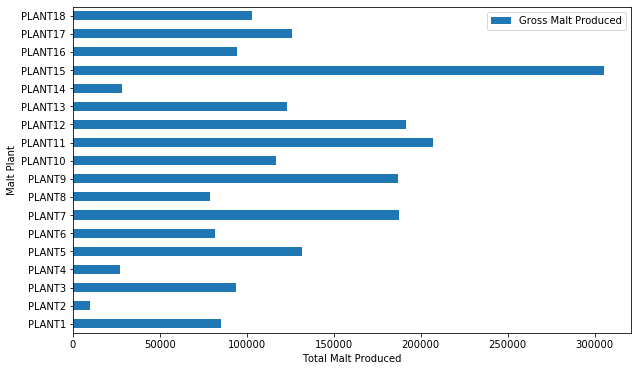

In [8]:
df_t = df[['Malting Plant', 'Gross Malt Produced']]
df_t.set_index('Malting Plant', inplace=True)
df_t.head()
df_t.plot(kind='barh',figsize=(10, 6))
plt.xlabel('Total Malt Produced')
plt.ylabel('Malt Plant')
plt.show()

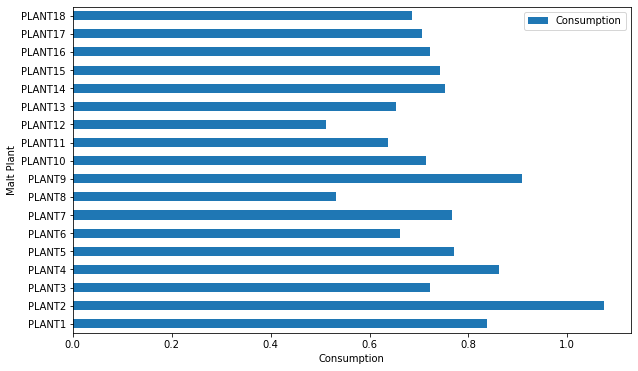

In [9]:
df_t = df[['Malting Plant', 'Consumption']]
df_t.set_index('Malting Plant', inplace=True)
df_t.head()
df_t.plot(kind='barh',figsize=(10, 6))
plt.xlabel('Consumption')
plt.ylabel('Malt Plant')
plt.show()

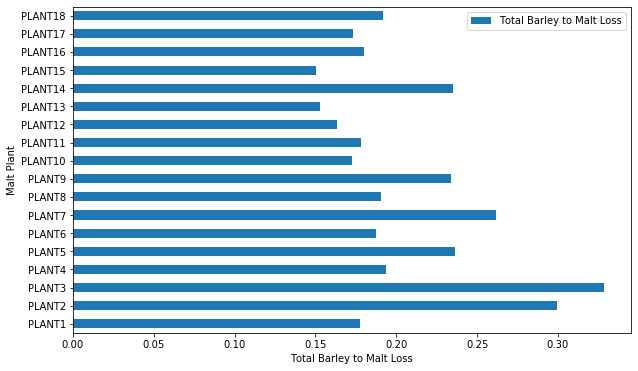

In [10]:
df_t = df[['Malting Plant', 'Total Barley to Malt Loss']]
df_t.set_index('Malting Plant', inplace=True)
df_t.head()
df_t.plot(kind='barh',figsize=(10, 6))
plt.xlabel('Total Barley to Malt Loss')
plt.ylabel('Malt Plant')
plt.show()

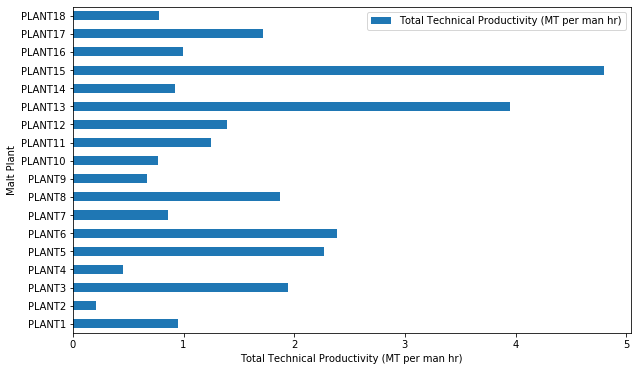

In [11]:
df_t = df[['Malting Plant', 'Total Technical Productivity (MT per man hr)']]
df_t.set_index('Malting Plant', inplace=True)
df_t.head()
df_t.plot(kind='barh',figsize=(10, 6))
plt.xlabel('Total Technical Productivity (MT per man hr)')
plt.ylabel('Malt Plant')
plt.show()

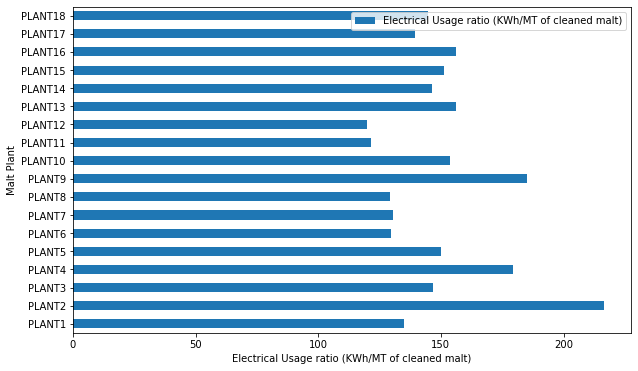

In [12]:
df_t = df[['Malting Plant', 'Electrical Usage ratio (KWh/MT of cleaned malt)']]
df_t.set_index('Malting Plant', inplace=True)
df_t.head()
df_t.plot(kind='barh',figsize=(10, 6))
plt.xlabel('Electrical Usage ratio (KWh/MT of cleaned malt)')
plt.ylabel('Malt Plant')
plt.show()

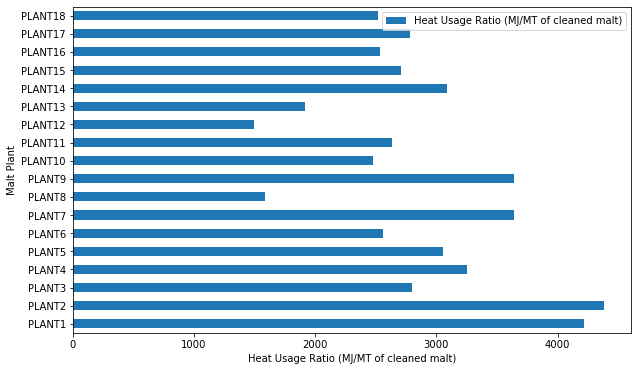

In [13]:
df_t = df[['Malting Plant', 'Heat Usage Ratio (MJ/MT of cleaned malt)']]
df_t.set_index('Malting Plant', inplace=True)
df_t.head()
df_t.plot(kind='barh',figsize=(10, 6))
plt.xlabel('Heat Usage Ratio (MJ/MT of cleaned malt)')
plt.ylabel('Malt Plant')
plt.show()

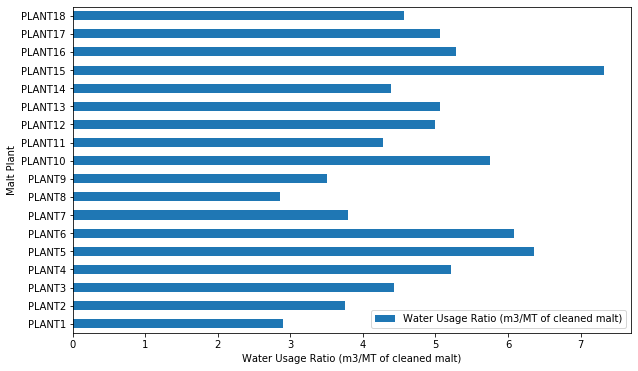

In [14]:
df_t = df[['Malting Plant', 'Water Usage Ratio (m3/MT of cleaned malt)']]
df_t.set_index('Malting Plant', inplace=True)
df_t.head()
df_t.plot(kind='barh',figsize=(10, 6))
plt.xlabel('Water Usage Ratio (m3/MT of cleaned malt)')
plt.ylabel('Malt Plant')
plt.show()

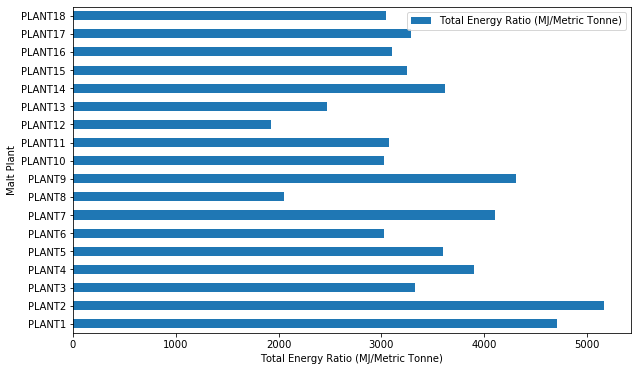

In [15]:
df_t = df[['Malting Plant', 'Total Energy Ratio (MJ/Metric Tonne)']]
df_t.set_index('Malting Plant', inplace=True)
df_t.head()
df_t.plot(kind='barh',figsize=(10, 6))
plt.xlabel('Total Energy Ratio (MJ/Metric Tonne)')
plt.ylabel('Malt Plant')
plt.show()

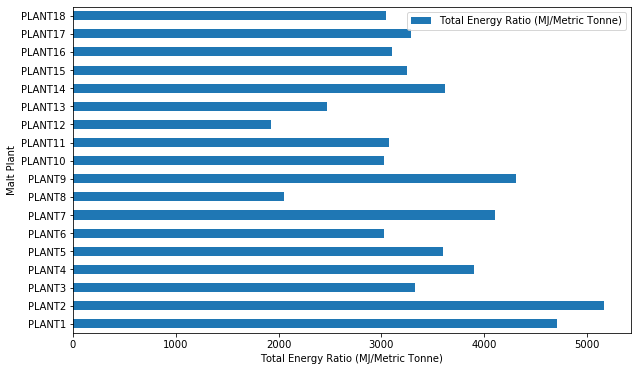

In [16]:
df_t = df[['Malting Plant', 'Total Energy Ratio (MJ/Metric Tonne)']]
df_t.set_index('Malting Plant', inplace=True)
df_t.head()
df_t.plot(kind='barh',figsize=(10, 6))
plt.xlabel('Total Energy Ratio (MJ/Metric Tonne)')
plt.ylabel('Malt Plant')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


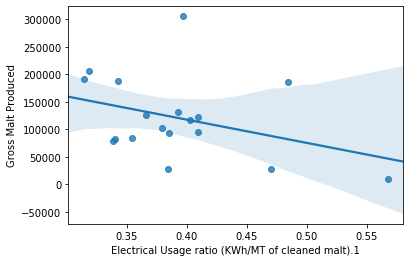

In [17]:
sns.regplot(x="Electrical Usage ratio (KWh/MT of cleaned malt).1", y="Gross Malt Produced", data=df)

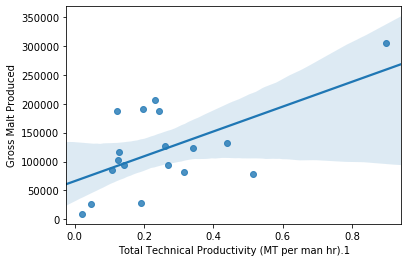

In [18]:
sns.regplot(x="Total Technical Productivity (MT per man hr).1", y="Gross Malt Produced", data=df)

In [19]:
df.corr()

,Malt Line,Number of Steep Lines,MA-K2301-Minimum Steeping Cycle Time,Duration of Steep (hours),Steep Cycle Time (Hours),Barley Batch Size (MT),Number of immersions (#),Number of aerations (#),End of Steep Moisture (%),Minimum Germination Time MA-K2301,Duration of Germ (hours),Steep to Germ transfer time (Hours),Germ to Kiln transfer time (Hours),Green Malt Moisture at end Germination (%),Vessel Cleaning Time (Hours),Start of Germ Temp ('C),Max of Germ Temp ('C),End of Germ Temp ('C),Minimum Kilning time MA-K2301,Duration of Kiln (hours),Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours),Moisture (%),Gross Malt Produced,Dirty Barley to Clean Malt Yield (#),Clean Barley to Clean Malt Yield (#),Total Barley to Malt Loss,Total Technical Productivity (MT per man hr),Total Plant Productivity (MT per man hour),Total Energy Ratio (MJ/Metric Tonne),Electrical Usage ratio (KWh/MT of cleaned malt),Heat Usage Ratio (MJ/MT of cleaned malt),Water Usage Ratio (m3/MT of cleaned malt),Electrical Usage ratio (KWh/MT of cleaned malt).1,Heat Usage Ratio (MJ/MT of cleaned malt).1,Water Usage Ratio (m3/MT of cleaned malt).1,Consumption,Total Barley to Malt Loss.1,Total Technical Productivity (MT per man hr).1
Malt Line,1.000000,0.662410,0.171068,-0.134090,0.178392,-0.033275,-0.158035,0.050965,-0.223666,-0.358317,-0.422762,-0.169157,-0.017251,0.003663,-0.139983,0.004780,0.272651,0.228458,0.157107,0.252162,0.302135,0.146581,0.571566,-0.512740,0.134743,-0.355933,0.539489,0.510623,0.113176,-0.212711,0.143986,0.128238,-0.212711,0.143986,0.128238,0.000052,0.539489,0.510623
Number of Steep Lines,0.662410,1.000000,-0.063018,0.114143,0.169356,-0.307455,-0.109562,-0.131236,-0.037595,-0.200187,-0.509050,-0.405430,-0.397020,0.117899,0.057604,-0.186530,0.144542,0.109449,-0.091352,0.203437,0.193905,-0.086136,0.269828,-0.441342,-0.357221,-0.320320,0.343256,0.193000,0.230614,0.089905,0.235585,0.186028,0.089905,0.235585,0.186028,0.210575,0.343256,0.193000
MA-K2301-Minimum Steeping Cycle Time,0.171068,-0.063018,1.000000,0.056572,0.017521,-0.080114,-0.294481,-0.121165,0.176362,0.435042,0.334847,0.060143,0.087984,-0.251241,-0.117183,-0.009829,0.051283,0.134335,0.276144,0.258456,0.491307,0.035476,-0.044629,0.328509,0.066562,0.398952,-0.215549,-0.286858,0.522455,0.586561,0.491423,-0.177188,0.586561,0.491423,-0.177188,0.598149,-0.215549,-0.286858
Duration of Steep (hours),-0.134090,0.114143,0.056572,1.000000,-0.141070,0.388258,0.005758,0.120155,0.366422,-0.017790,-0.195054,-0.288232,-0.576080,0.163172,0.063403,-0.051579,-0.004817,0.121738,-0.039331,0.310166,0.350802,-0.278892,0.223610,0.213935,0.034302,0.183583,-0.066970,-0.077657,0.298193,0.434686,0.269445,-0.193901,0.434686,0.269445,-0.193901,0.376829,-0.066970,-0.077657
Steep Cycle Time (Hours),0.178392,0.169356,0.017521,-0.141070,1.000000,0.124310,0.236201,0.312670,0.381592,-0.028520,-0.226065,0.367224,-0.120016,0.170753,-0.154775,-0.660491,-0.124884,0.142860,-0.237267,0.626210,0.500430,-0.078266,-0.116904,0.176506,-0.131260,0.249273,0.468611,0.366864,0.097339,0.092023,0.093464,0.219289,0.092023,0.093464,0.219289,0.119617,0.468611,0.366864
Barley Batch Size (MT),-0.033275,-0.307455,-0.080114,0.388258,0.124310,1.000000,0.059507,0.354096,0.207260,-0.015955,0.054971,0.319623,0.161046,0.328487,0.186959,-0.040943,-0.092592,0.158320,0.116687,0.268622,0.157237,0.104507,0.488424,0.244445,0.377528,0.190408,0.239702,0.311323,-0.125760,-0.279298,-0.103035,0.063441,-0.279298,-0.103035,0.063441,-0.199466,0.239702,0.311323
Number of immersions (#),-0.158035,-0.109562,-0.294481,0.005758,0.236201,0.059507,1.000000,0.769015,0.459068,-0.228763,0.153903,-0.118931,-0.304385,0.124801,0.110362,0.137277,-0.180006,-0.041377,-0.678376,-0.063494,-0.168921,0.047565,0.064317,-0.043564,-0.384071,-0.325488,0.348752,0.397220,-0.547196,-0.019278,-0.580428,0.445162,-0.019278,-0.580428,0.445162,-0.366276,0.348752,0.397220
Number of aerations (#),0.050965,-0.131236,-0.121165,0.120155,0.312670,0.354096,0.769015,1.000000,

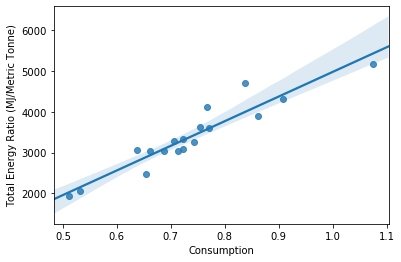

In [20]:
sns.regplot(x="Consumption", y="Total Energy Ratio (MJ/Metric Tonne)", data=df)

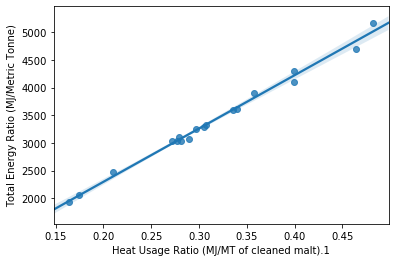

In [21]:
sns.regplot(x="Heat Usage Ratio (MJ/MT of cleaned malt).1", y="Total Energy Ratio (MJ/Metric Tonne)", data=df)

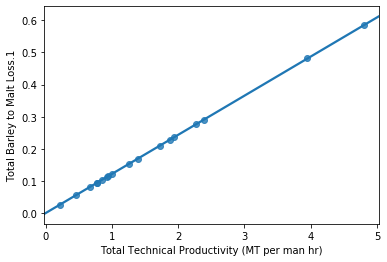

In [22]:
sns.regplot(x="Total Technical Productivity (MT per man hr)", y="Total Barley to Malt Loss.1", data=df)

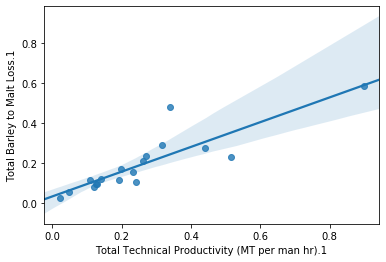

In [23]:
sns.regplot(x="Total Technical Productivity (MT per man hr).1", y="Total Barley to Malt Loss.1", data=df)

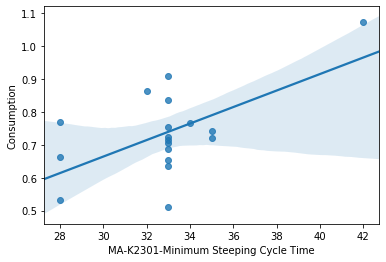

In [24]:
sns.regplot(x="MA-K2301-Minimum Steeping Cycle Time", y="Consumption", data=df)

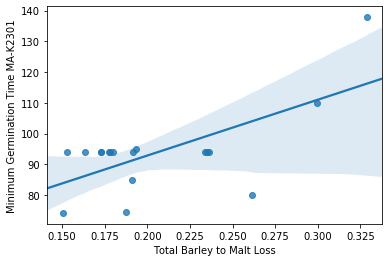

In [25]:
sns.regplot(x="Total Barley to Malt Loss", y="Minimum Germination Time MA-K2301", data=df)

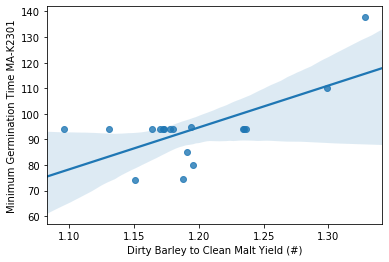

In [26]:
sns.regplot(x="Dirty Barley to Clean Malt Yield (#)", y="Minimum Germination Time MA-K2301", data=df)

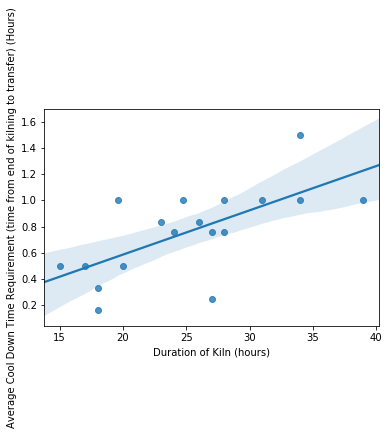

In [27]:
sns.regplot(x="Duration of Kiln (hours)", y="Average Cool Down Time Requirement (time from end of kilning to transfer) (Hours)", data=df)

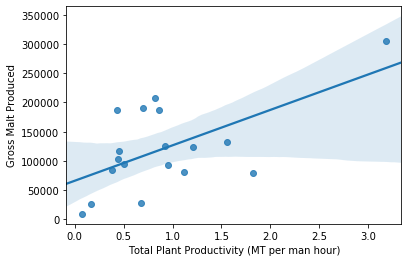

In [28]:
sns.regplot(x="Total Plant Productivity (MT per man hour)", y="Gross Malt Produced", data=df)

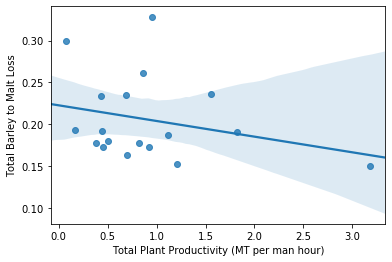

In [29]:
sns.regplot(x="Total Plant Productivity (MT per man hour)", y="Total Barley to Malt Loss", data=df)

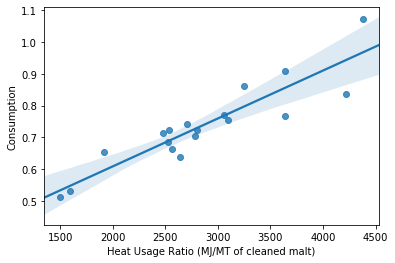

In [30]:
sns.regplot(x="Heat Usage Ratio (MJ/MT of cleaned malt)", y="Consumption", data=df)

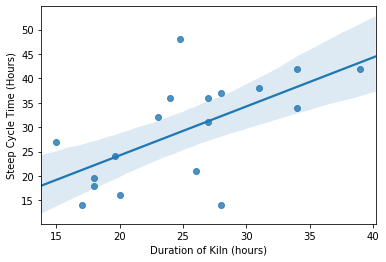

In [31]:
sns.regplot(x="Duration of Kiln (hours)", y="Steep Cycle Time (Hours)", data=df)

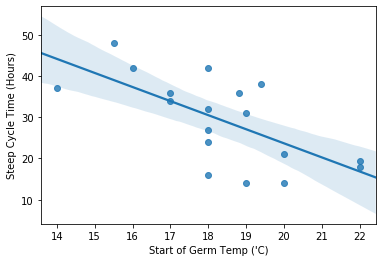

In [32]:
sns.regplot(x="Start of Germ Temp ('C)", y="Steep Cycle Time (Hours)", data=df)

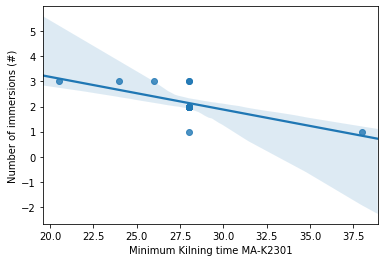

In [33]:
sns.regplot(x="Minimum Kilning time MA-K2301", y="Number of immersions (#)", data=df)

In [34]:
df['Heating Source for Kiln\nAir to Air, Hot water Boiler, Steam Boiler, other (Choose)'].unique()

array(['Hot Water Boiler', 'Steam Boiler', 'Gas Burner', 'Natural Gas',
       'Hot Air'], dtype=object)

In [35]:
df['Type of Steep Tanks (Choose)'].unique()

array(['Conical', 'Cylindro Conical steep tanks', 'FBST',
       'Conical and flat bottom', 'CCT', 'Flat Bottom', 'Plate type',
       'Cylinder / Conical tank'], dtype=object)

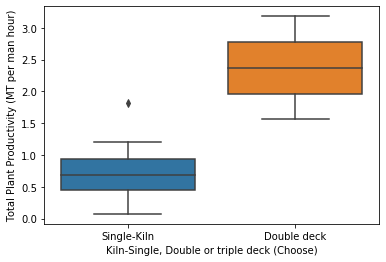

In [36]:
sns.boxplot(x="Kiln-Single, Double or triple deck (Choose)", y="Total Plant Productivity (MT per man hour)", data=df)

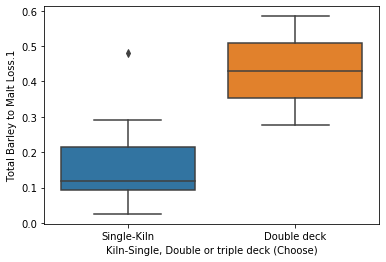

In [37]:
sns.boxplot(x="Kiln-Single, Double or triple deck (Choose)", y="Total Barley to Malt Loss.1", data=df)

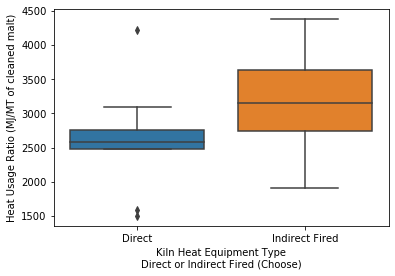

In [38]:
sns.boxplot(x="Kiln Heat Equipment Type\nDirect or Indirect Fired (Choose)", y="Heat Usage Ratio (MJ/MT of cleaned malt)", data=df)

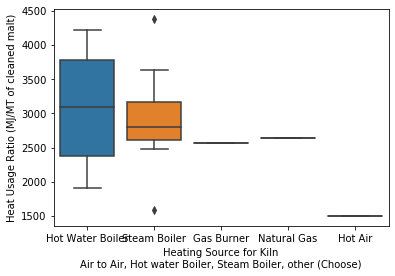

In [39]:
sns.boxplot(x="Heating Source for Kiln\nAir to Air, Hot water Boiler, Steam Boiler, other (Choose)", y="Heat Usage Ratio (MJ/MT of cleaned malt)", data=df)

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
Z = df[['Duration of Steep (hours)','Barley Batch Size (MT)','Duration of Germ (hours)','Max of Germ Temp (\'C)','Duration of Kiln (hours)',]]

In [63]:
lm.fit(Z, df['Total Barley to Malt Loss.1'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
lm.intercept_

0.36290607307926975

In [65]:
lm.coef_

array([-0.00159083,  0.00042437, -0.00399705,  0.00236185,  0.00413543])

In [66]:
Y_hat = lm.predict(Z)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


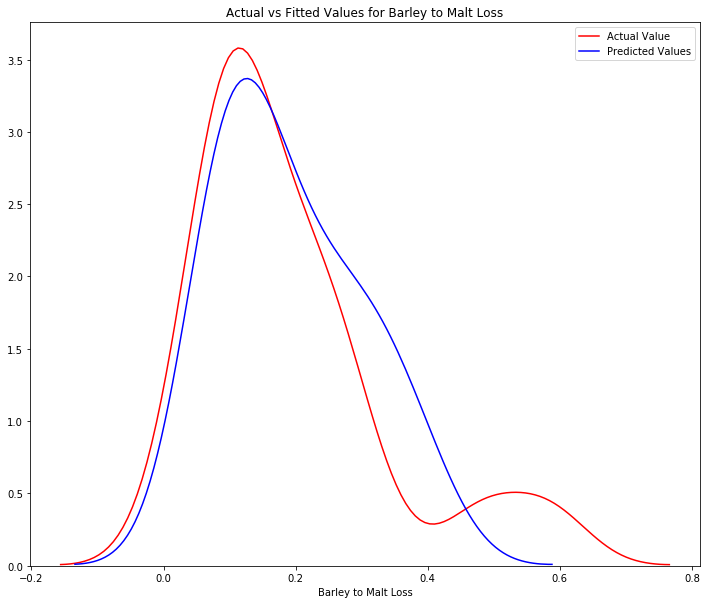

In [67]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Total Barley to Malt Loss.1'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Barley to Malt Loss')
plt.xlabel('Barley to Malt Loss')


plt.show()
plt.close()

In [98]:
Z = df[['Malt Line','Number of Steep Lines','Number of immersions (#)','Number of aerations (#)','Steep to Germ transfer time (Hours)','Germ to Kiln transfer time (Hours)','Vessel Cleaning Time (Hours)']]

In [99]:
lm.fit(Z, df['Total Plant Productivity (MT per man hour)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
lm.intercept_

-1.249844767865019

In [101]:
lm.coef_

array([ 0.35102779, -0.05248704,  0.60765891,  0.00971016,  0.1012971 ,
        0.01587464,  0.01883789])

In [102]:
Y_hat = lm.predict(Z)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


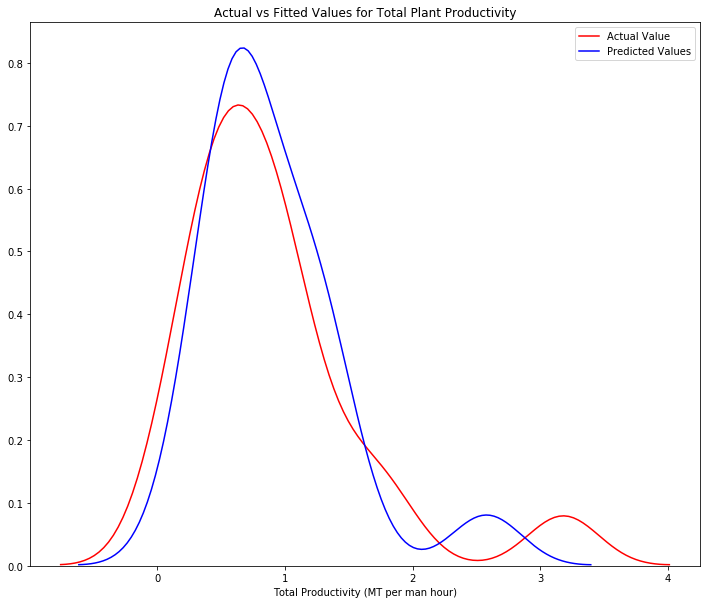

In [103]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Total Plant Productivity (MT per man hour)'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Total Plant Productivity')
plt.xlabel('Total Productivity (MT per man hour)')


plt.show()
plt.close()

In [104]:
Z = df[['Malt Line','Number of Steep Lines','Duration of Steep (hours)','Duration of Germ (hours)','Steep to Germ transfer time (Hours)','Germ to Kiln transfer time (Hours)','Vessel Cleaning Time (Hours)','Max of Germ Temp (\'C)','Duration of Kiln (hours)']]

In [105]:
lm.coef_

array([ 0.35102779, -0.05248704,  0.60765891,  0.00971016,  0.1012971 ,
        0.01587464,  0.01883789])

In [106]:
lm.intercept_

-1.249844767865019

In [107]:
lm.fit(Z, df['Total Energy Ratio (MJ/Metric Tonne)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
Y_hat = lm.predict(Z)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


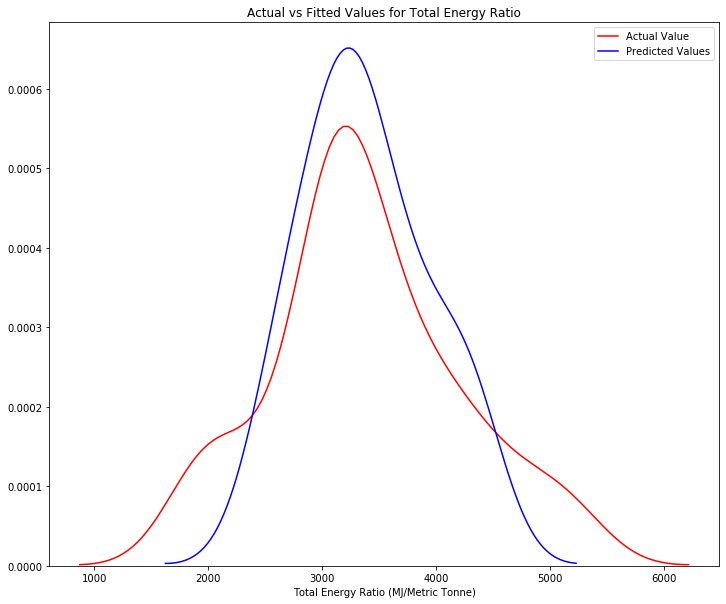

In [109]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Total Energy Ratio (MJ/Metric Tonne)'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Total Energy Ratio')
plt.xlabel('Total Energy Ratio (MJ/Metric Tonne)')


plt.show()
plt.close()

In [116]:
Z = df[['Malt Line','Duration of Steep (hours)','Barley Batch Size (MT)','Duration of Germ (hours)','Vessel Cleaning Time (Hours)','Max of Germ Temp (\'C)','Duration of Kiln (hours)']]

In [117]:
lm.fit(Z, df['Consumption'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
lm.coef_

array([ 0.01132095,  0.00216292, -0.00053761,  0.00312889, -0.01624769,
       -0.00111817,  0.00859766])

In [119]:
lm.intercept_

0.33242515509500525

In [120]:
Y_hat = lm.predict(Z)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


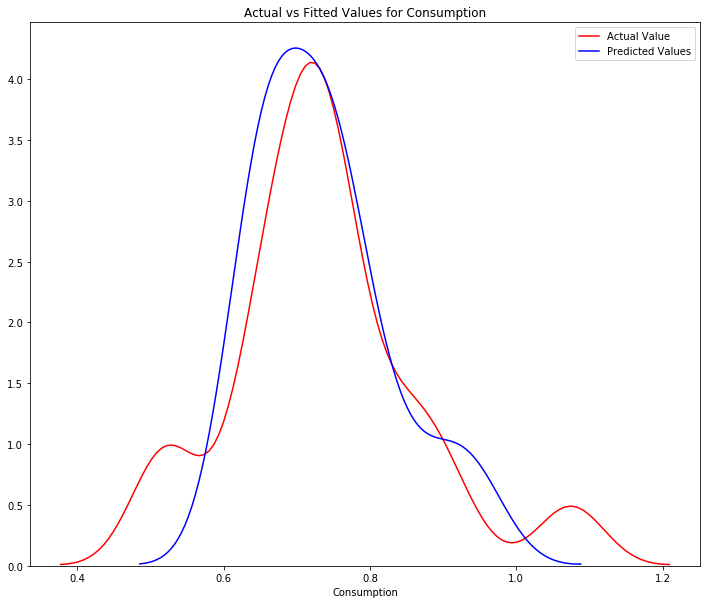

In [121]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Consumption'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Consumption')
plt.xlabel('Consumption')


plt.show()
plt.close()